In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#  EDUNET FOUNDATION -Class Notebook
# LAB 19- Implementing Decision Tree
# Decision Tree Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Prodigy_Internship_DataScience/Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:

dataset.sample(5)
# Splitting the data into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Training the Decision Tree Classification model on the Training set criterion = 'entropy', random_state = 0
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))
print(classifier.predict(sc.transform([[25,97000]])))

[0]
[1]


In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_pred,y_test

(array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 0]),
 array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 0]))

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        73
           1       0.82      0.79      0.80        47

    accuracy                           0.85       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120

Confusion Matrix:
 [[65  8]
 [10 37]]


<ipython-input-14-8dd10f43fe06>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


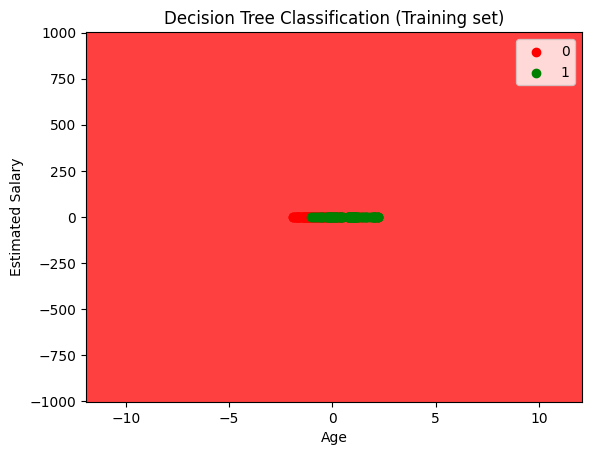

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 10, stop = X_train[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_train[:, 1].min() - 1000, stop = X_train[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-15-e7f4a085e188>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


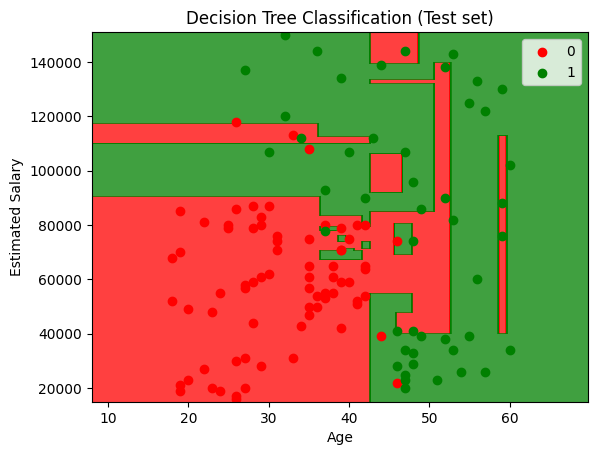

In [15]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_test, y_test = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 10, stop = X_test[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_test[:, 1].min() - 1000, stop = X_test[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

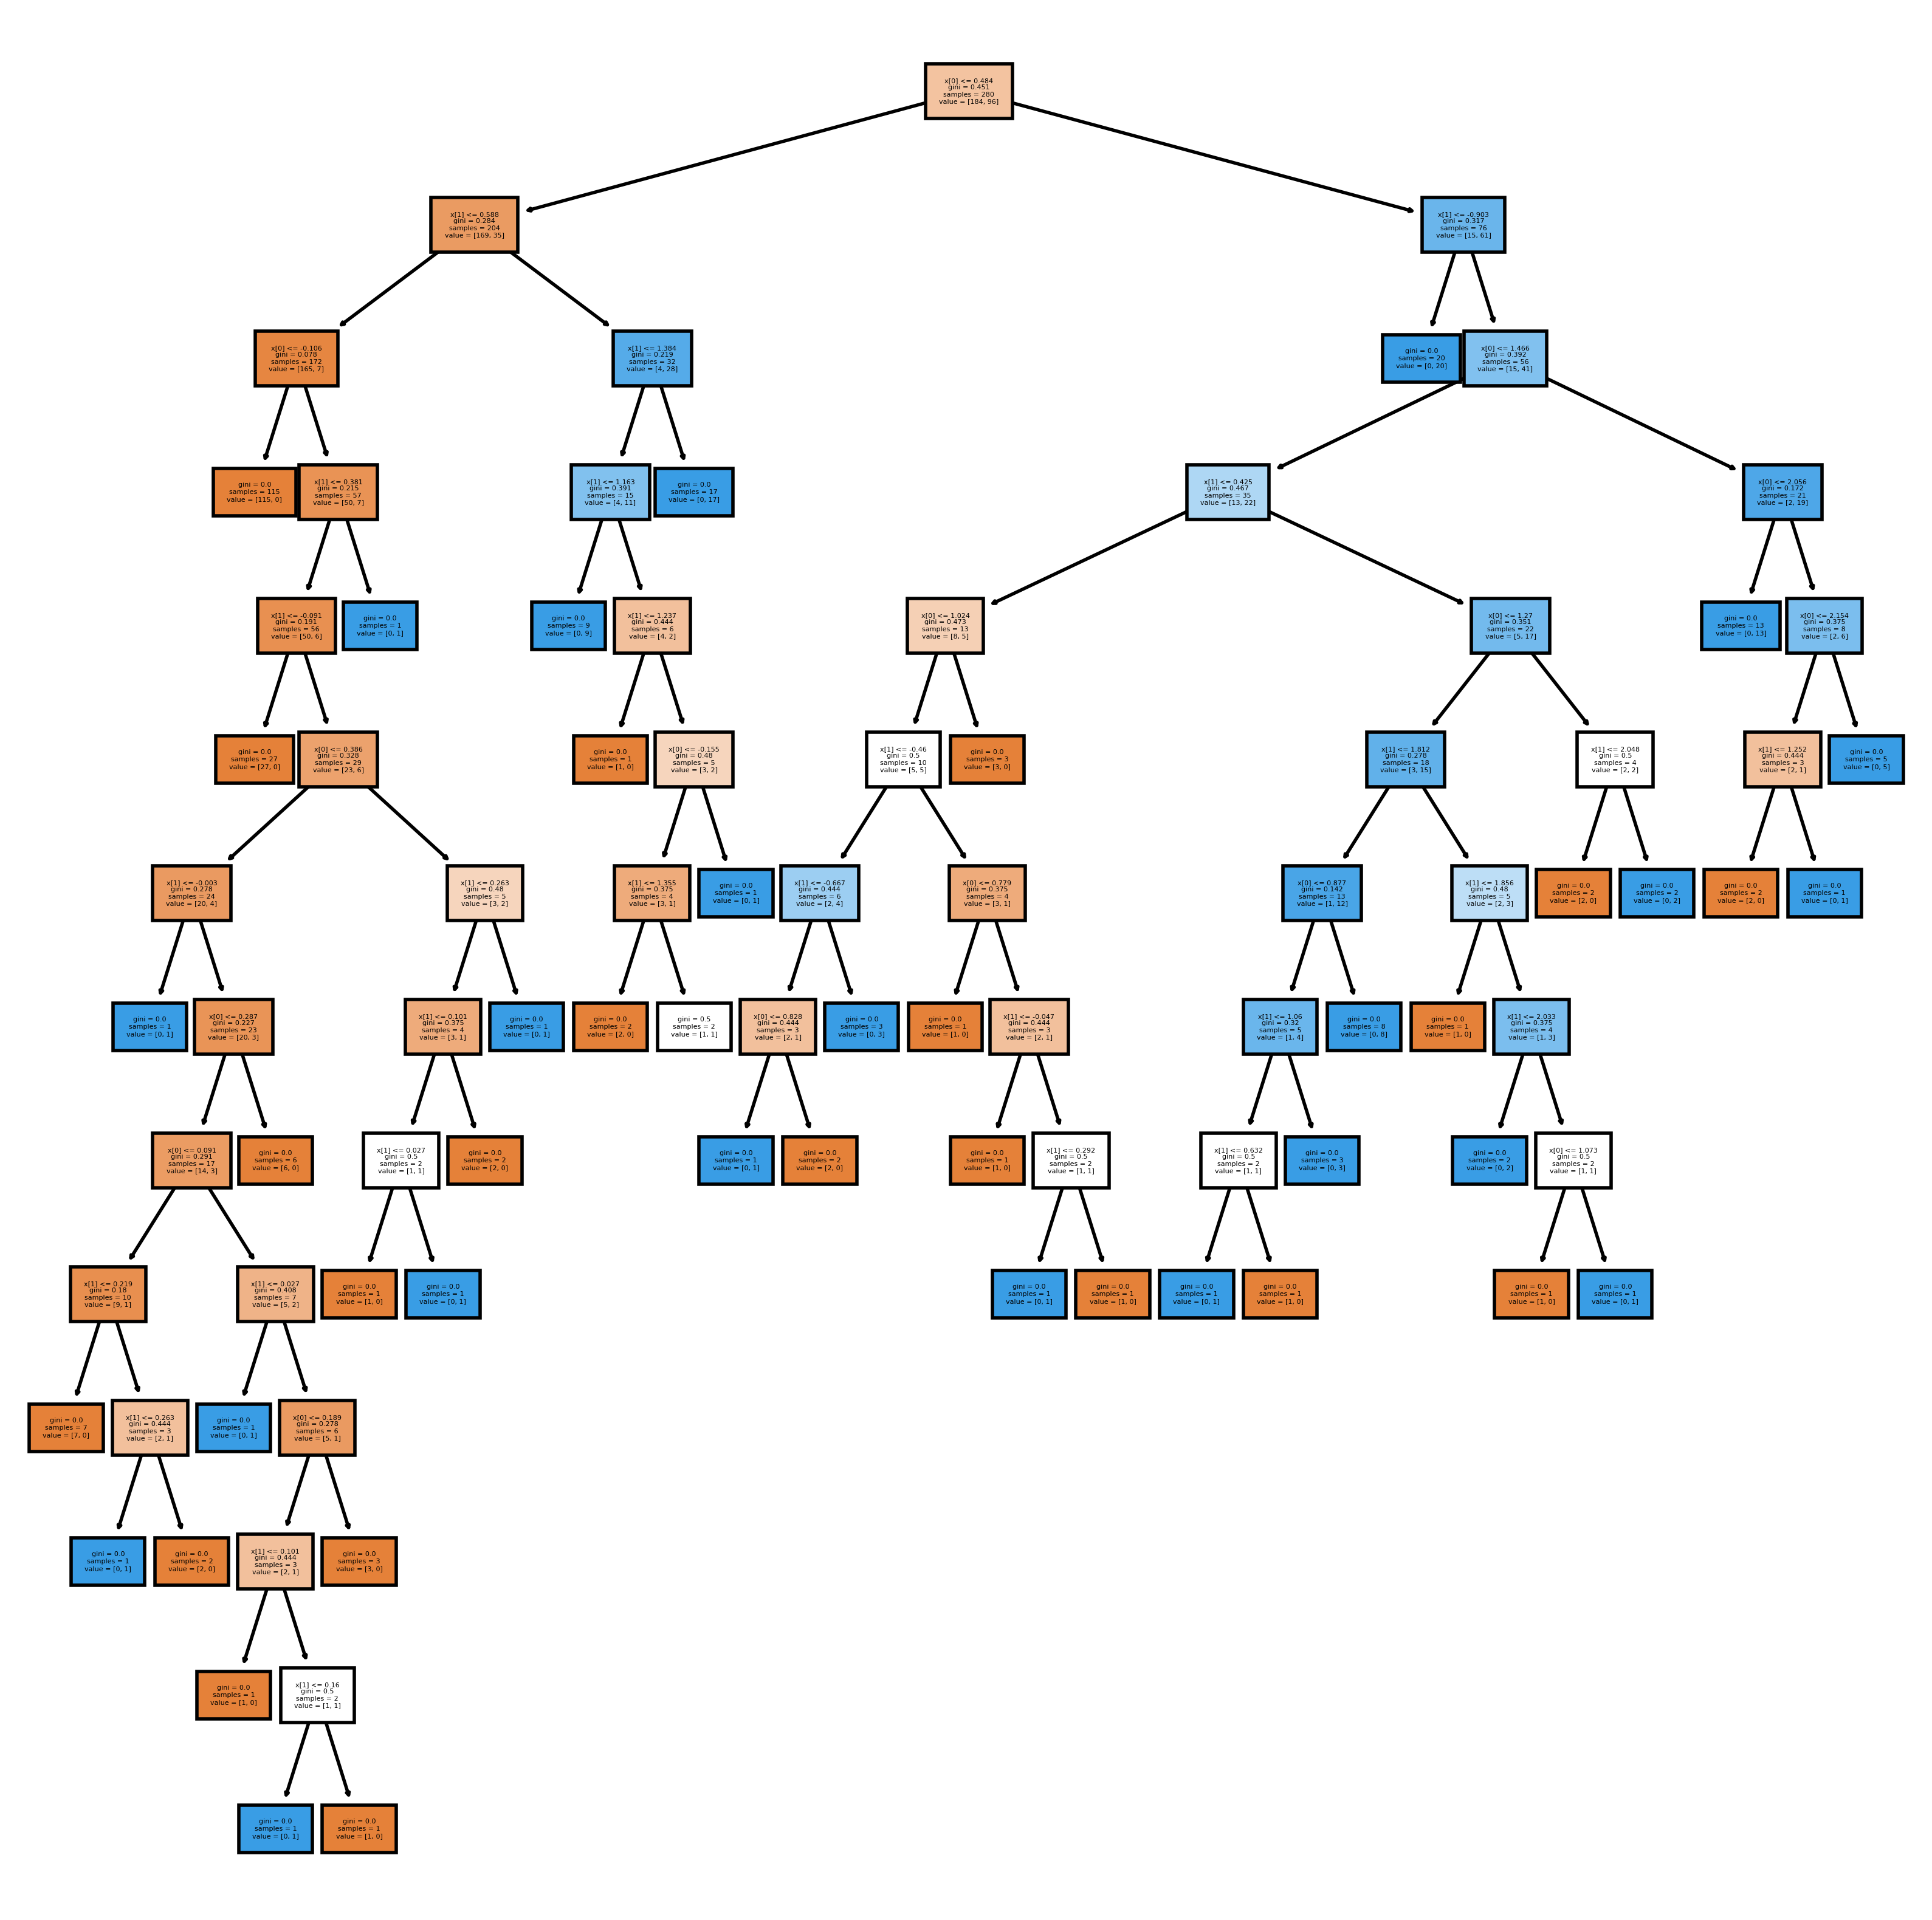

In [16]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y_pred,y_test))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=400)
plot_tree(classifier, filled=True, ax=axes, fontsize=2)
plt.show()

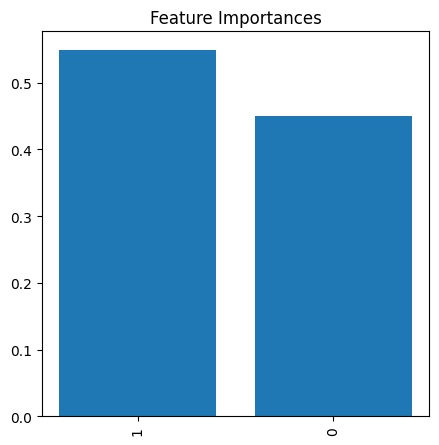

In [19]:
import pandas as pd

# Load the data into a Pandas DataFrame
df = pd.DataFrame(X)

# Plot feature importances
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(5, 5))
plt.title("Feature Importances")
plt.bar(range(df.shape[1]), importances[indices], align="center")
plt.xticks(range(df.shape[1]), df.columns[indices], rotation=90)
plt.show()
plt.show()